In [1]:
import numpy as np
from scipy.stats import kstest,ks_2samp
import pandas as pd
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFD72050B8>]],
      dtype=object)

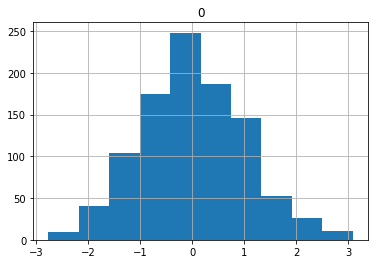

In [2]:
n=1000
x=np.random.normal(0,1,n)
pd.DataFrame(x).hist()

In [3]:
kstest(x,'uniform')

KstestResult(statistic=0.504, pvalue=1.10692823483855e-235)

In [4]:
kstest(x,'norm')

KstestResult(statistic=0.020721790829631825, pvalue=0.7837886934745731)

In [11]:
kstest(x,'halfnorm')

KstestResult(statistic=0.504, pvalue=1.10692823483855e-235)

In [12]:
y=np.random.normal(0,1,n)
z=np.random.uniform(0,1,n)

In [13]:
df=pd.DataFrame(x)
df.rename(columns={df.columns[0]:'value'},inplace=True)

In [15]:
df.head()

,value
0,-0.293445
1,-0.603576
2,0.674251
3,-0.845747
4,0.160641


In [17]:
df=df.sort_values(by='value').reset_index(drop=True)
df.head()

,value
0,-2.758893
1,-2.735293
2,-2.650540
3,-2.593692
4,-2.447186


In [18]:
df['prob']=1/n
df.head()

,value,prob
0,-2.758893,0.001
1,-2.735293,0.001
2,-2.650540,0.001
3,-2.593692,0.001
4,-2.447186,0.001


In [19]:
df_y=pd.DataFrame(y)
df_y.rename(columns={df_y.columns[0]:'value'},inplace=True)
df_y=df_y.sort_values(by='value').reset_index(drop=True)
df_y['prob']=1/n
df_y.head()

,value,prob
0,-3.096849,0.001
1,-2.987173,0.001
2,-2.806860,0.001
3,-2.790769,0.001
4,-2.575528,0.001


In [20]:
x_y_df=df.merge(df_y,how='outer',left_on='value',right_on='value').sort_values(by='value')
x_y_df.head()

,value,prob_x,prob_y
1000,-3.096849,NaN,0.001
1001,-2.987173,NaN,0.001
1002,-2.806860,NaN,0.001
1003,-2.790769,NaN,0.001
0,-2.758893,0.001,NaN


In [21]:
x_y_df=x_y_df.fillna(0)

In [22]:
x_y_df=x_y_df.fillna(0)
x_y_df['cum_x']=x_y_df['prob_x'].cumsum()
x_y_df.head()

,value,prob_x,prob_y,cum_x
1000,-3.096849,0.000,0.001,0.000
1001,-2.987173,0.000,0.001,0.000
1002,-2.806860,0.000,0.001,0.000
1003,-2.790769,0.000,0.001,0.000
0,-2.758893,0.001,0.000,0.001


In [23]:
x_y_df['cum_y']=x_y_df['prob_y'].cumsum()
x_y_df.head()

,value,prob_x,prob_y,cum_x,cum_y
1000,-3.096849,0.000,0.001,0.000,0.001
1001,-2.987173,0.000,0.001,0.000,0.002
1002,-2.806860,0.000,0.001,0.000,0.003
1003,-2.790769,0.000,0.001,0.000,0.004
0,-2.758893,0.001,0.000,0.001,0.004


In [26]:
x_y_df=x_y_df.reset_index(drop=True)

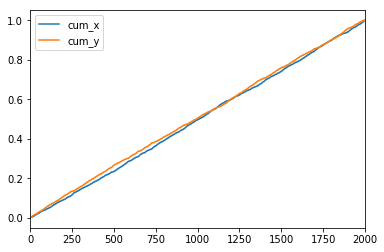

In [31]:
x_y_df=x_y_df.reset_index(drop=True)
x_y_df[['cum_x','cum_y']].plot()

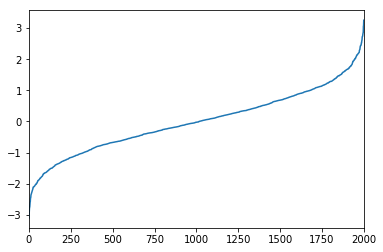

In [32]:
x_y_df.value.plot()

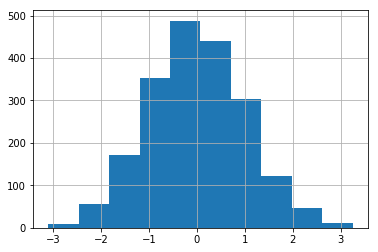

In [34]:
x_y_df.value.hist()

In [35]:
ks_2samp(x,y)

Ks_2sampResult(statistic=0.03300000000000003, pvalue=0.6406050184621188)

In [36]:
df_z=pd.DataFrame(z)
df_z.rename(columns={df_z.columns[0]:'value'},inplace=True)
df_z=df_z.sort_values(by='value').reset_index(drop=True)
df_z['prob']=1/n
df_z.head()

,value,prob
0,0.000644,0.001
1,0.001668,0.001
2,0.001718,0.001
3,0.002202,0.001
4,0.002607,0.001


In [37]:
x_z_df=df.merge(df_z,how='outer',left_on='value',right_on='value').sort_values(by='value')
x_z_df.head()

,value,prob_x,prob_y
0,-2.758893,0.001,NaN
1,-2.735293,0.001,NaN
2,-2.650540,0.001,NaN
3,-2.593692,0.001,NaN
4,-2.447186,0.001,NaN


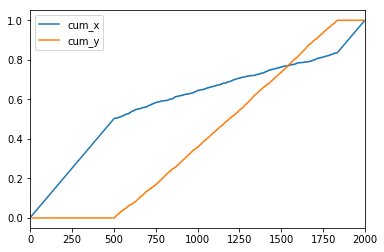

In [42]:
x_z_df=x_z_df.fillna(0)
x_z_df['cum_x']=x_z_df['prob_x'].cumsum()
x_z_df['cum_y']=x_z_df['prob_y'].cumsum()
x_z_df=x_z_df.reset_index(drop=True)
x_z_df[['cum_x','cum_y']].plot()

In [47]:
ks_2samp(x,z)

Ks_2sampResult(statistic=0.504, pvalue=5.587863354159026e-112)

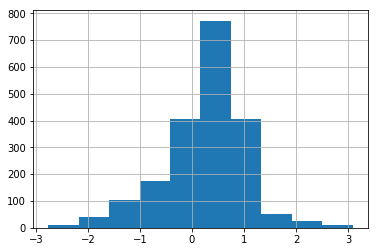

In [45]:
x_z_df.value.hist()

In [58]:
kstest(x_y_df.value,'norm')

KstestResult(statistic=0.012415153139599955, pvalue=0.917475619029209)

In [54]:
kstest(x_z_df.value,'norm')

KstestResult(statistic=0.24842947063944304, pvalue=3.20084338821473e-109)

In [67]:
a=pd.DataFrame(np.random.random((40,4)))

In [68]:
a.columns=['a','b','c','d']

In [70]:
a.head()

,a,b,c,d
0,0.653855,0.590109,0.494312,0.546033
1,0.459790,0.019457,0.729364,0.770828
2,0.045025,0.844306,0.042518,0.241761
3,0.371286,0.077661,0.221744,0.190231
4,0.612683,0.893347,0.961207,0.105603


In [75]:
b=a.sample(n=5, random_state=1)
b

,a,b,c,d
2,0.045025,0.844306,0.042518,0.241761
31,0.005276,0.966005,0.041055,0.860395
3,0.371286,0.077661,0.221744,0.190231
21,0.106227,0.039849,0.169316,0.570547
27,0.919251,0.710702,0.802240,0.927760


In [82]:
c=a.merge(b,indicator='k',how='left')
c[c['k']=='left_only']

,a,b,c,d,k
0,0.653855,0.590109,0.494312,0.546033,left_only
1,0.459790,0.019457,0.729364,0.770828,left_only
4,0.612683,0.893347,0.961207,0.105603,left_only
5,0.062834,0.348955,0.536135,0.529667,left_only
6,0.701691,0.570313,0.278124,0.425149,left_only
7,0.609818,0.622071,0.747936,0.185003,left_only
8,0.126254,0.126520,0.244895,0.849239,left_only
9,0.507297,0.844560,0.394960,0.234660,left_only
10,0.291241,0.466859,0.702997,0.717809,left_only
11,0.485534,0.091416,0.550614,0.780179,left_only
